In [465]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [467]:
df = pd.read_csv('Churn_Modelling.csv',)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [469]:
df = df.drop(columns=['RowNumber','CustomerId','Surname']).copy()

In [471]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [485]:
ohe_gender=OneHotEncoder(drop='first',dtype=int)
ohe_gender_data = ohe_gender.fit_transform(df[['Gender']]).toarray()

In [487]:
df[ohe_gender.get_feature_names_out()[0]] = ohe_gender_data

In [489]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [515]:
ohe_geo=OneHotEncoder(dtype=int)
ohe_geo_data = ohe_geo.fit_transform(df[['Geography']]).toarray()

In [517]:
df[list(ohe_geo.get_feature_names_out())]=ohe_geo_data

In [525]:
df.drop(columns=['Gender','Geography'],inplace=True)

In [541]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [543]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [547]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [551]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [555]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [529]:
iqr = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
upper_limit_age = df['Age'].quantile(0.75) + (1.5 * iqr)

In [531]:
round(df[df['Age'] > upper_limit_age].shape[0]/10000,2)*100

4.0

In [533]:
lower_limit_cs = df['CreditScore'].quantile(0.25) - (1.5 * iqr)
round(df[df['CreditScore'] < lower_limit_cs].shape[0]/10000,2)

0.2

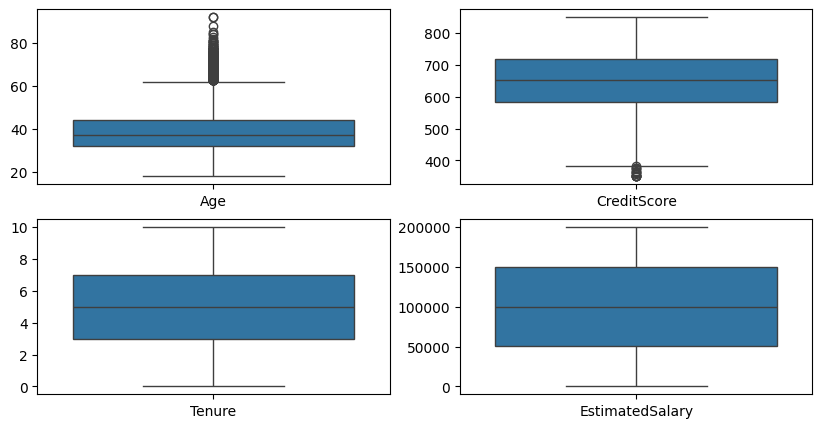

In [535]:
fig,axes = plt.subplots(2,2,figsize=(10,5))
sns.boxplot(df[['Age']],ax=axes[0,0])
sns.boxplot(df[['CreditScore']],ax=axes[0,1])
sns.boxplot(df[['Tenure']],ax=axes[1,0])
sns.boxplot(df[['EstimatedSalary']],ax=axes[1,1])
plt.show()

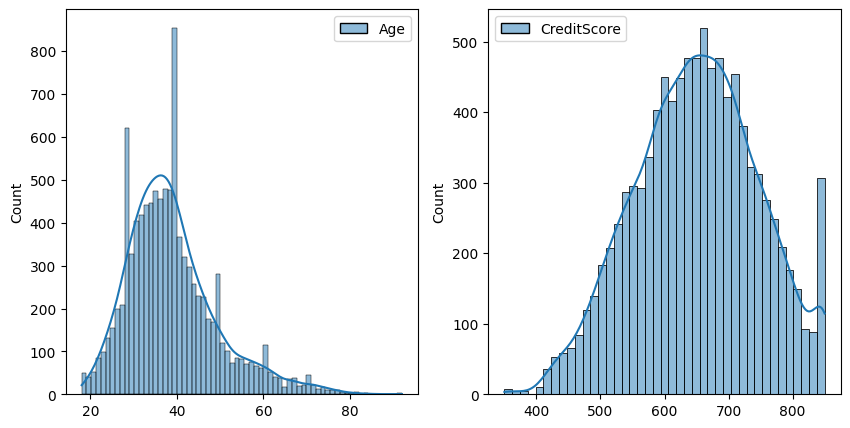

In [537]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[['Age']],kde=True,ax=axes[0])
sns.histplot(df[['CreditScore']],kde=True,ax=axes[1])
plt.show()

In [353]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

<Axes: >

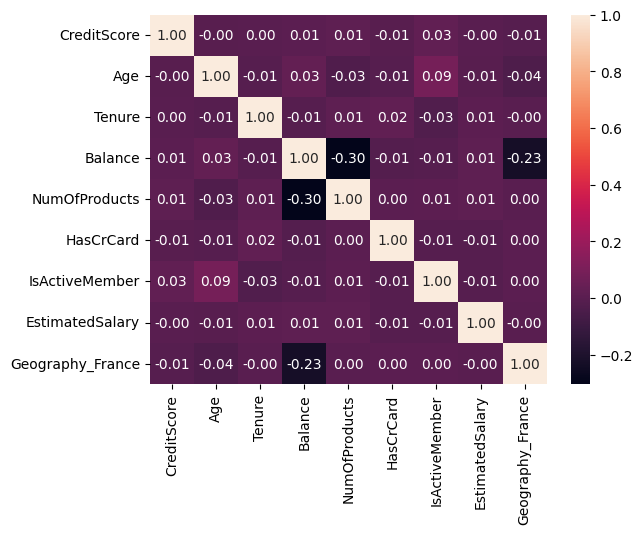

In [539]:
sns.heatmap(df.drop(columns=['Exited', 'Gender_Male',
       'Geography_Germany', 'Geography_Spain']).corr(),annot=True,fmt='0.2f')

# Building Ann using Robust scaler And keeping the outliers.

In [583]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [389]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()

In [562]:
from sklearn.model_selection import train_test_split
X , y = df.drop(columns=['Exited']) , df['Exited']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [570]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [589]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
]
)

C:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [595]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [597]:
opt = tf.optimizers.Adam(learning_rate=0.01)

In [607]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy','Recall'])

In [613]:
log_dir = "logs/fit/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [615]:
tf_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [626]:
early_stop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [628]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    epochs=100,
    callbacks=[tf_callback,early_stop]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.4837 - accuracy: 0.8541 - loss: 0.3457 - val_Recall: 0.3995 - val_accuracy: 0.8575 - val_loss: 0.3425
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4652 - accuracy: 0.8596 - loss: 0.3444 - val_Recall: 0.4402 - val_accuracy: 0.8610 - val_loss: 0.3470
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4706 - accuracy: 0.8625 - loss: 0.3354 - val_Recall: 0.5242 - val_accuracy: 0.8640 - val_loss: 0.3432
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4773 - accuracy: 0.8604 - loss: 0.3341 - val_Recall: 0.4707 - val_accuracy: 0.8620 - val_loss: 0.3422
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4820 - accuracy: 0.8733 - loss: 0.3119 - val_Recall: 0.3868 - val_accuracy: 0.8575 - val_loss: 0.3397
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Recall: 0.4431 - accuracy: 0.8589 - loss: 0.3373 - val_Recall: 0.5318 - val_accuracy: 0.8580 - val_loss: 0.348

In [630]:
model.save('model.h5')

In [634]:
%load_ext tensorboard

In [638]:
%tensorboard --logdir logs/fit

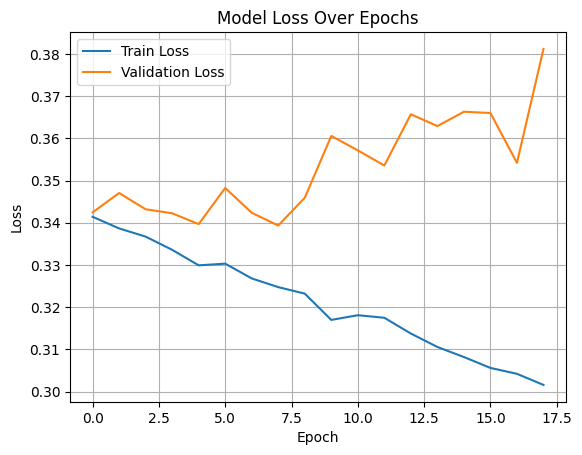

In [651]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


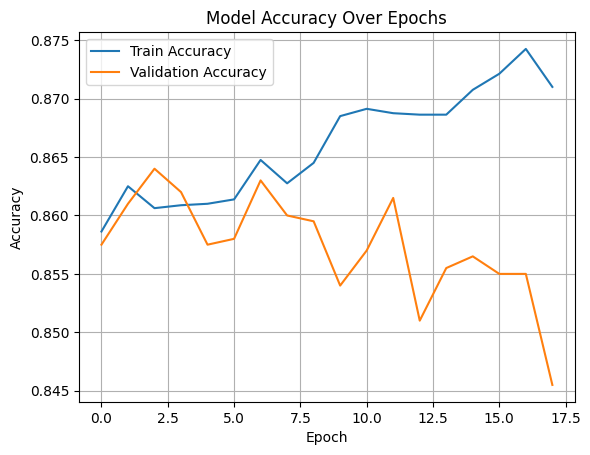

In [653]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [655]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

# Building Ann using Robust scaler And handling the outliers.

In [860]:
from sklearn.model_selection import train_test_split
X , y = df.drop(columns=['Exited']) , df['Exited']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [862]:
indecies = (X[X['Age'] > upper_limit_age]['Age']).index

In [864]:
X.iloc[indecies,1] = upper_limit_age

In [866]:
X[X['Age'] > upper_limit_age]['Age']

Series([], Name: Age, dtype: int64)

In [868]:
from sklearn.model_selection import train_test_split
X , y = df.drop(columns=['Exited']) , df['Exited']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [870]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [872]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
]
)

C:\Users\ahmed\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [874]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 64)                  │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [876]:
opt = tf.optimizers.Adam(learning_rate=0.01)

In [878]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy','Recall'])

In [880]:
early_stop = EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [882]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test,y_test),
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.1669 - accuracy: 0.7996 - loss: 0.4551 - val_Recall: 0.4606 - val_accuracy: 0.8640 - val_loss: 0.3428
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - Recall: 0.4615 - accuracy: 0.8595 - loss: 0.3513 - val_Recall: 0.4835 - val_accuracy: 0.8635 - val_loss: 0.3481
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - Recall: 0.4617 - accuracy: 0.8587 - loss: 0.3439 - val_Recall: 0.5191 - val_accuracy: 0.8610 - val_loss: 0.3437
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - Recall: 0.4421 - accuracy: 0.8539 - loss: 0.3495 - val_Recall: 0.4071 - val_accuracy: 0.8600 - val_loss: 0.3346
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - Recall: 0.4439 - accuracy: 0.8563 - loss: 0.3500 - val_Recall: 0.4784 - val_accuracy: 0.8620 - val_loss: 0.3375
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - Recall: 0.4607 - accuracy: 0.8574 - loss: 0.3375 - val_Recall: 0.4300 - val_accuracy: 0.8600 - val_los

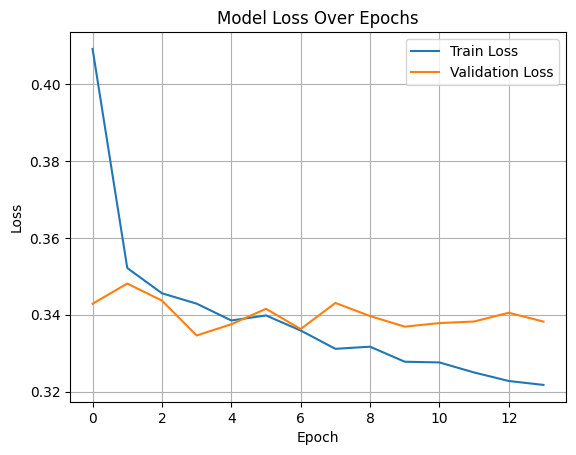

In [883]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


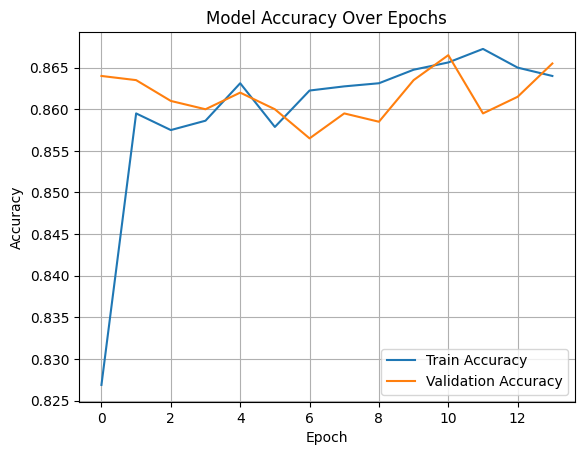

In [884]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [766]:
model.save('no_ol_model.h5')

In [ ]:
pickle.dump(ohe_gender,open('Modles\\gender.pkl','wb'))
pickle.dump(ohe_geo,open('Modles\\geo.pkl','wb'))

In [ ]:
pickle.dump(sc,open('Modles\\robus_scaler.pkl','wb'))

In [889]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0
